Initial Parameters

In [2]:
import json
import matplotlib.pyplot as plt
import numpy as np

In [3]:
output_dir_prefix = "ieor6617_output_correct/A100/CIFAR10/"

transformer_models_16 = {
    "deit_small_patch16_LS" : "APE",
    "rope_axial_deit_small_patch16_LS" : "RoPE-Axial",
    "rope_mixed_deit_small_patch16_LS" : "RoPE-Mixed",
    "rope_axial_ape_deit_small_patch16_LS" : "RoPE-Axial + APE",
    "rope_mixed_ape_deit_small_patch16_LS" : "RoPE-Mixed + APE",
}

transformer_models_8 = {
    "deit_small_patch8_LS" : "APE",
    "rope_axial_deit_small_patch8_LS" : "RoPE-Axial",
    "rope_mixed_deit_small_patch8_LS" : "RoPE-Mixed",
    "rope_axial_ape_deit_small_patch8_LS" : "RoPE-Axial + APE",
    "rope_mixed_ape_deit_small_patch8_LS" : "RoPE-Mixed + APE",
}

performer_models_16 = {
    "performer_deit_small_patch16_LS" : "APE",
    "performer_rope_axial_deit_small_patch16_LS" : "RoPE-Axial",
    "performer_rope_mixed_deit_small_patch16_LS" : "RoPE-Mixed",
    "performer_rope_axial_ape_deit_small_patch16_LS" : "RoPE-Axial + APE",
    "performer_rope_mixed_ape_deit_small_patch16_LS" : "RoPE-Mixed + APE",
}

performer_models_8 = {
    "performer_deit_small_patch8_LS" : "APE",
    "performer_rope_axial_deit_small_patch8_LS" : "RoPE-Axial",
    "performer_rope_mixed_deit_small_patch8_LS" : "RoPE-Mixed",
    "performer_rope_axial_ape_deit_small_patch8_LS" : "RoPE-Axial + APE",
    "performer_rope_mixed_ape_deit_small_patch8_LS" : "RoPE-Mixed + APE",
}

eval_file = "eval.txt"
log_file = "log.txt"
training_time_file = "training_time.txt"

eval_input_sizes_16 = [144, 192, 224, 256, 320, 384, 512]
eval_input_sizes_8 = [144, 192, 224, 256, 320, 384]

dataset_name = "CIFAR10"
patch_sizes = ["patch16", "patch8"]

Transformer Accuracy

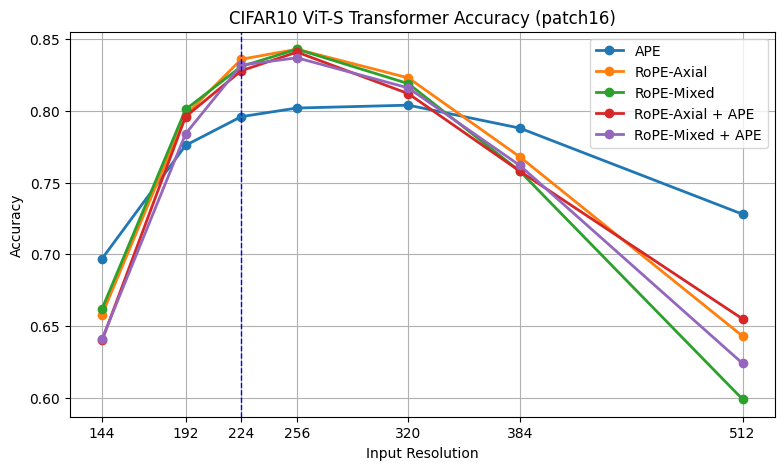

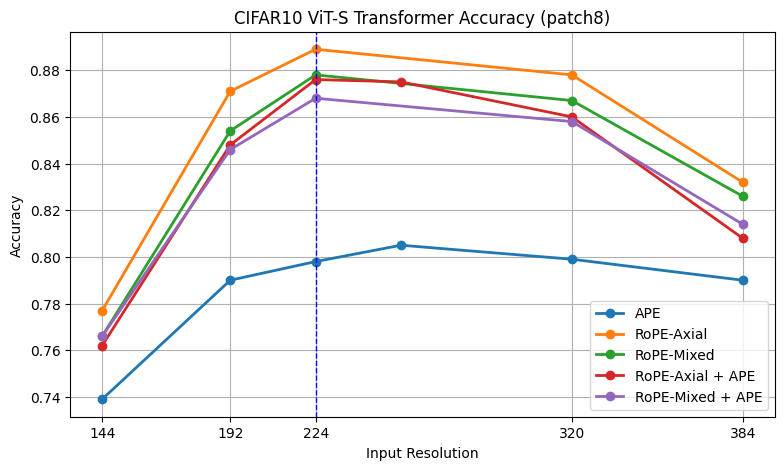

In [4]:
for patch_size in patch_sizes:
    fig = plt.figure(figsize=(20,5))
    axes = fig.add_subplot(1,2,1)
    for model_name, model_label in transformer_models_16.items():
        model_name = model_name.replace("patch16", patch_size)
        eval_filepath = output_dir_prefix + model_name + "/" + eval_file
        with open(eval_filepath) as f:
            eval_data = f.read()

        # reconstructing data as a dictionary
        eval_data = "[" + eval_data.replace("}", "},\n").strip(",\n") + "]"

        # Parse the corrected JSON
        eval_data = json.loads(eval_data)

        filtered_eval_data = {}
        for eval_dict in eval_data:
            # only include valid eval (100 epochs)
            if eval_dict["epochs"] == 100 and eval_dict["input_size"] >= 144: 
                acc1 =  eval_dict["acc1"]

                # remove % sign
                acc1 = acc1[:-1]

                # change to decimal
                acc1 = float(acc1) / 100
                filtered_eval_data[eval_dict["input_size"]] = acc1

        filtered_eval_data = dict(sorted(filtered_eval_data.items()))

        # Plot eval
        input_sizes = list(filtered_eval_data.keys())
        accuracy = list(filtered_eval_data.values())
        axes.plot(input_sizes,accuracy,'-o',label=model_label, linewidth=2) 

    axes.legend(loc='best')
    axes.set_xticks(input_sizes)
    axes.set_xlabel("Input Resolution")
    axes.set_ylabel("Accuracy")
    axes.set_title(f"{dataset_name} ViT-S Transformer Accuracy ({patch_size})")

    axes.axvline(x=224, color='blue', linestyle='--', linewidth=1, label='Training Resolution')

    axes.grid()
plt.show()


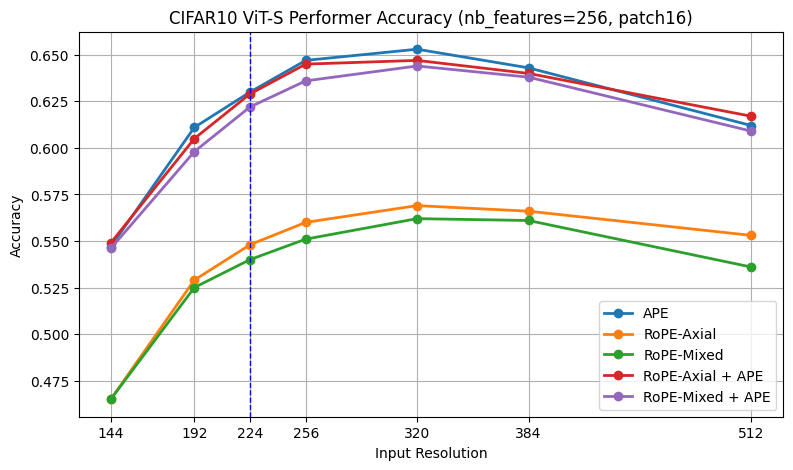

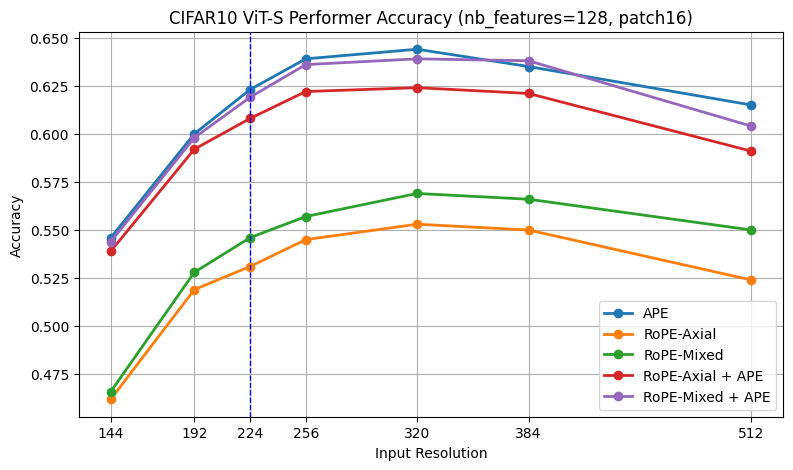

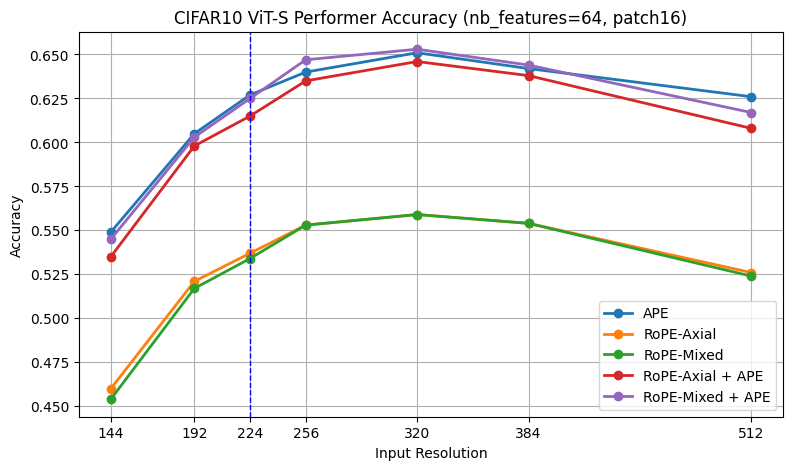

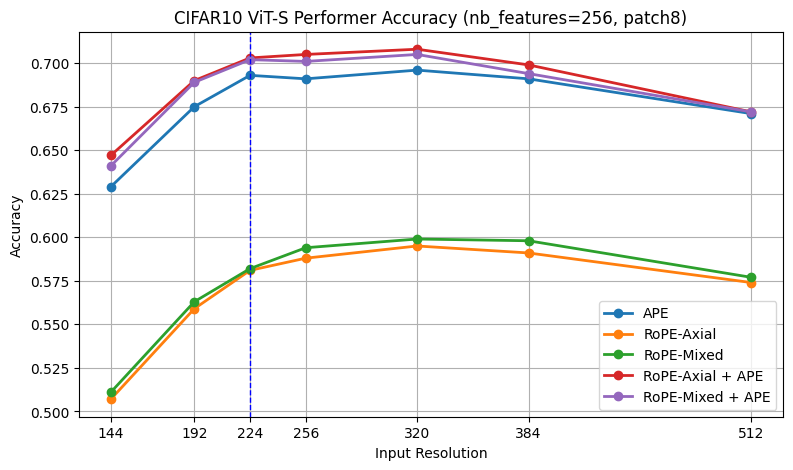

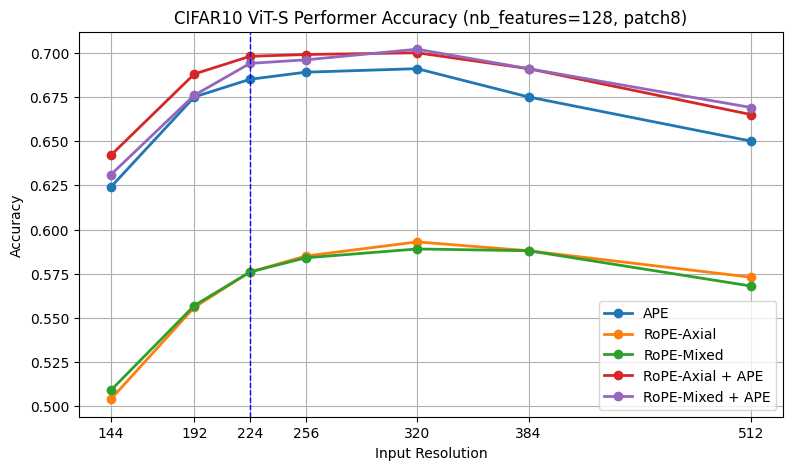

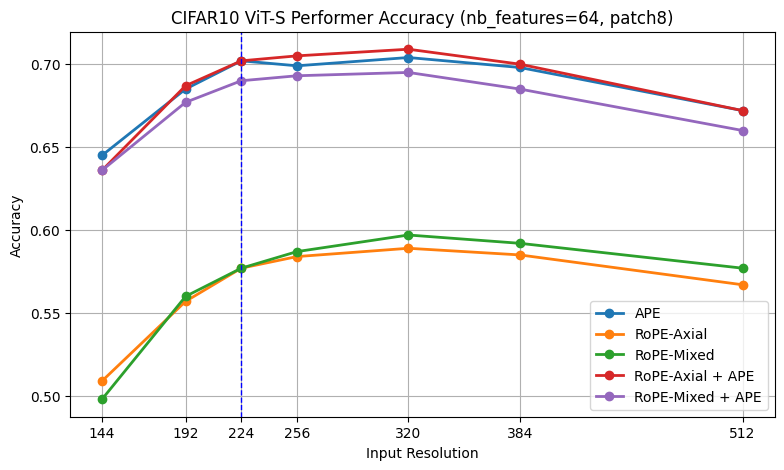

In [5]:
nb_features_lst = {"256_features/": "nb_features=256", 
                   "128_features/": "nb_features=128",
                   "64_features/": "nb_features=64",
                     }

for patch_size in patch_sizes:
    for i, (nb_features_path, nb_features) in enumerate(nb_features_lst.items()):
        fig = plt.figure(figsize=(20,5))
        axes = fig.add_subplot(1,2,1)
        for model_name, model_label in performer_models_16.items():
            model_name = model_name.replace("patch16", patch_size)
            eval_filepath = output_dir_prefix + nb_features_path + model_name + "/" + eval_file
            with open(eval_filepath) as f:
                eval_data = f.read()

            # reconstructing data as a dictionary
            eval_data = "[" + eval_data.replace("}", "},\n").strip(",\n") + "]"

            # Parse the corrected JSON
            eval_data = json.loads(eval_data)

            filtered_eval_data = {}
            for eval_dict in eval_data:
                # only include valid eval (100 epochs)
                if eval_dict["epochs"] == 100: 
                    acc1 =  eval_dict["acc1"]

                    # remove % sign
                    acc1 = acc1[:-1]

                    # change to decimal
                    acc1 = float(acc1) / 100
                    filtered_eval_data[eval_dict["input_size"]] = acc1

            filtered_eval_data = dict(sorted(filtered_eval_data.items()))

            # Plot eval
            input_sizes = list(filtered_eval_data.keys())
            accuracy = list(filtered_eval_data.values())
            axes.plot(input_sizes,accuracy,'-o',label=model_label, linewidth=2) 

        axes.legend(loc='best')
        axes.set_xticks(input_sizes)
        axes.set_xlabel("Input Resolution")
        axes.set_ylabel("Accuracy")
        axes.set_title(f"CIFAR10 ViT-S Performer Accuracy ({nb_features}, {patch_size})")

        axes.axvline(x=224, color='blue', linestyle='--', linewidth=1, label='Training Resolution')

        axes.grid()
plt.show()





Training Speed Table

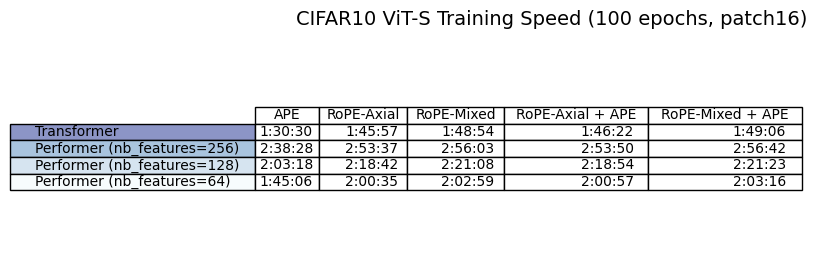

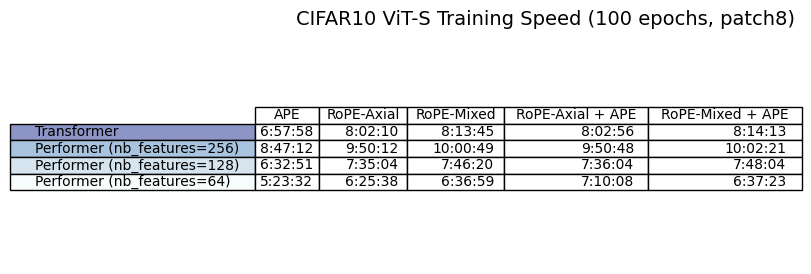

In [6]:
# PULL TRANSFORMER TRAINING SPEED
for patch_size in patch_sizes:
    transformer_data = {}
    for model_name, model_label in transformer_models_16.items():
        model_name = model_name.replace("patch16", patch_size)
        training_filepath = output_dir_prefix + model_name + "/" + training_time_file
        with open(training_filepath) as f:
            training_speed_data = f.read()

        # reconstructing data as a dictionary
        training_speed_data = "[" + training_speed_data.replace("}", "},\n").strip(",\n") + "]"

        # Parse the corrected JSON
        training_speed_data = json.loads(training_speed_data)

        i = 0
        for training_speed_dict in training_speed_data:
            # only include valid eval (100 epochs)
            if (training_speed_dict["end_epoch"] == 100) and (training_speed_dict["start_epoch"] == 0): 
                if i > 0:
                    Exception("check why there is more than one training speed with 100 epochs")
                transformer_data[model_label] = training_speed_dict["training_time_str"]
                i += 1

    # setup table with training speed
    training_speed_contents =  [list(transformer_data.values())]
    cols = list(transformer_data.keys())
    rows = ["Transformer"]

    # PULL PERFORMER TRAINING SPEED
    for nb_features_path, nb_features in nb_features_lst.items():
        performer_data_feature = {}
        for model_name, model_label in performer_models_16.items():
            model_name = model_name.replace("patch16", patch_size)
            training_filepath = output_dir_prefix + nb_features_path + model_name + "/" + training_time_file
    
            with open(training_filepath) as f:
                training_speed_data = f.read()

            # reconstructing data as a dictionary
            training_speed_data = "[" + training_speed_data.replace("}", "},\n").strip(",\n") + "]"

            # Parse the corrected JSON
            training_speed_data = json.loads(training_speed_data)

            i = 0
            for training_speed_dict in training_speed_data:
                # only include valid eval (100 epochs)
                if (training_speed_dict["end_epoch"] == 100) and (training_speed_dict["start_epoch"] == 0): 
                    if i > 0:
                        Exception("check why there is more than one training speed with 100 epochs")
                    performer_data_feature[model_label] = training_speed_dict["training_time_str"]
                    i += 1

        # check that order is correct
        assert list(performer_data_feature.keys()) == cols

        training_speed_contents.append(list(performer_data_feature.values()))
        rows.append(f"Performer ({nb_features})")

    fig, axs = plt.subplots(figsize=(6, 3))

    colors = plt.cm.BuPu(np.linspace(0, 0.5, len(rows))) 
    n_rows = len(training_speed_contents) 
    
    index = np.arange(len(cols)) + 0.3
    bar_width = 0.4
    
    # Initialize the vertical-offset for 
    # the line plots. 
    y_offset = np.zeros(len(cols)) 
    
    # Plot line plots and create text labels  
    # for the table 
    cell_text = [] 
    for row in range(n_rows): 
        y_offset = training_speed_contents[row] 
        cell_text.append(y_offset) 

    # Reverse colors and text labels to display 
    # the last value at the top. 
    colors = colors[::-1] 
    
    # Add a table at the bottom of the axes 
    table = axs.table(cellText=cell_text, 
                        rowLabels=rows, 
                        rowColours=colors, 
                        colLabels=cols, 
                        loc='center') 
    
    # Adjust layout to make room for the table: 
    axs.axis('off')
    axs.axis('tight')
    axs.set_title(f'CIFAR10 ViT-S Training Speed (100 epochs, {patch_size})',loc='left', fontsize=14) 
    table.auto_set_font_size(True)
    table.auto_set_column_width(col=list(range(len(cols))))

plt.show() 

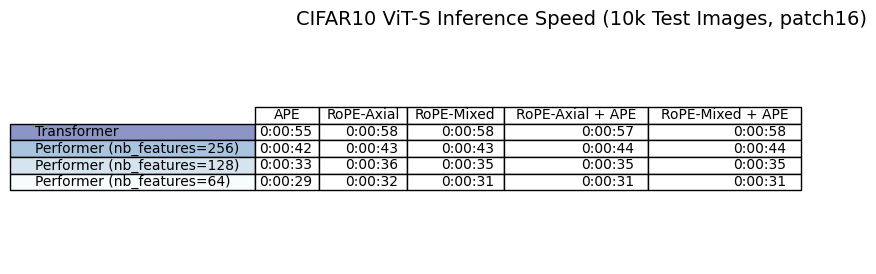

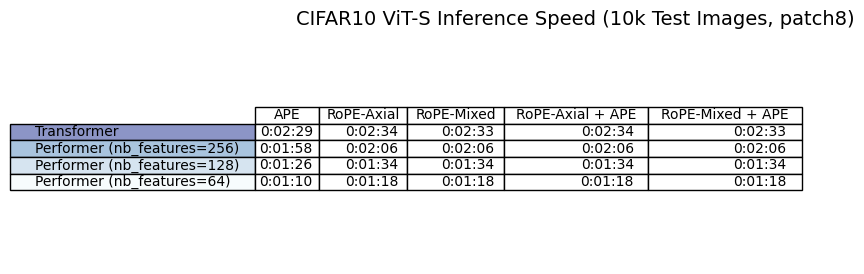

In [7]:
# PULL TRANSFORMER INFERENCE SPEED
for patch_size in patch_sizes:
    transformer_data = {}
    for model_name, model_label in transformer_models_16.items():
        model_name = model_name.replace("patch16", patch_size)
        eval_filepath = output_dir_prefix + model_name + "/" + eval_file
        with open(eval_filepath) as f:
            eval_speed_data = f.read()

        # reconstructing data as a dictionary
        eval_speed_data = "[" + eval_speed_data.replace("}", "},\n").strip(",\n") + "]"

        # Parse the corrected JSON
        eval_speed_data = json.loads(eval_speed_data)

        for eval_speed_dict in eval_speed_data:
            # only include valid eval (100 epochs)
            if (eval_speed_dict["epochs"] == 100): 
                transformer_data[model_label] = eval_speed_dict["eval_time_str"]

    # setup table with training speed
    eval_speed_contents =  [list(transformer_data.values())]
    cols = list(transformer_data.keys())
    rows = ["Transformer"]

    # PULL PERFORMER TRAINING SPEED
    for nb_features_path, nb_features in nb_features_lst.items():
        performer_data_feature = {}
        for model_name, model_label in performer_models_16.items():
            model_name = model_name.replace("patch16", patch_size)
            eval_filepath = output_dir_prefix + nb_features_path + model_name + "/" + eval_file
    
            with open(eval_filepath) as f:
                eval_speed_data = f.read()

            # reconstructing data as a dictionary
            eval_speed_data = "[" + eval_speed_data.replace("}", "},\n").strip(",\n") + "]"

            # Parse the corrected JSON
            eval_speed_data = json.loads(eval_speed_data)

            for eval_speed_dict in eval_speed_data:
                # only include valid eval (100 epochs)
                if (eval_speed_dict["epochs"] == 100): 
                    performer_data_feature[model_label] = eval_speed_dict["eval_time_str"]
                    i += 1

        # check that order is correct
        assert list(performer_data_feature.keys()) == cols

        eval_speed_contents.append(list(performer_data_feature.values()))
        rows.append(f"Performer ({nb_features})")

    fig, axs = plt.subplots(figsize=(6, 3))

    colors = plt.cm.BuPu(np.linspace(0, 0.5, len(rows))) 
    n_rows = len(eval_speed_contents) 
    
    index = np.arange(len(cols)) + 0.3
    bar_width = 0.4
    
    # Initialize the vertical-offset for 
    # the line plots. 
    y_offset = np.zeros(len(cols)) 
    
    # Plot line plots and create text labels  
    # for the table 
    cell_text = [] 
    for row in range(n_rows): 
        y_offset = eval_speed_contents[row] 
        cell_text.append(y_offset) 

    # Reverse colors and text labels to display 
    # the last value at the top. 
    colors = colors[::-1] 
    
    # Add a table at the bottom of the axes 
    table = axs.table(cellText=cell_text, 
                        rowLabels=rows, 
                        rowColours=colors, 
                        colLabels=cols, 
                        loc='center') 
    
    # Adjust layout to make room for the table: 
    axs.axis('off')
    axs.axis('tight')
    axs.set_title(f'CIFAR10 ViT-S Inference Speed (10k Test Images, {patch_size})',loc='left', fontsize=14) 
    table.auto_set_font_size(True)
    table.auto_set_column_width(col=list(range(len(cols))))

plt.show() 